In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 1000)

# Contents

1. Reports
2. 

In [3]:
data_dir = 'data\\'

## Import REPORTS, REPORT_DRUG, DRUG_INGREDIENTS, REACTIONS

In [82]:
# import data

reports = pd.read_csv(data_dir + 'CVADR/reports.txt',
                      delimiter='$',
                      header=None,
                      names=['REPORT_NO', 'E2B_IMP_SAFETYREPORT_ID', 'VERSION_NO', 'DATRECEIVED', 'DATINTRECEIVED', 'MAH_NO', 'REPORT_TYPE_CODE', 'REPORT_TYPE_ENG', 'REPORT_TYPE_FR', 'GENDER_CODE', 'GENDER_ENG', 'GENDER_FR', 'AGE', 'AGE_Y', 'AGE_UNIT_ENG', 'AGE_UNIT_FR', 'OUTCOME_CODE', 'OUTCOME_ENG', 'OUTCOME_FR', 'WEIGHT', 'WEIGHT_UNIT_ENG', 'WEIGHT_UNIT_FR',
                             'HEIGHT', 'HEIGHT_UNIT_ENG', 'HEIGHT_UNIT_FR', 'SERIOUSNESS_CODE', 'SERIOUSNESS_ENG', 'SERIOUSNESS_FR', 'DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE_ENG', 'REPORTER_TYPE_FR', 'SOURCE_CODE', 'SOURCE_ENG', 'SOURCE_FR', 'UNKNOWN_1', 'UNKNOWN_2', 'UNKNOWN_3'],
                      dtype={'REPORT_NO': 'object', 'E2B_IMP_SAFETYREPORT_ID': 'object', 'VERSION_NO': 'int64', 'MAH_NO': 'object', 'REPORT_TYPE_CODE': 'category', 'REPORT_TYPE_ENG': 'category', 'REPORT_TYPE_FR': 'category', 'GENDER_CODE': 'category', 'GENDER_ENG': 'category', 'GENDER_FR': 'category', 'AGE': 'float64', 'AGE_Y': 'float64', 'AGE_UNIT_ENG': 'category', 'AGE_UNIT_FR': 'category', 'OUTCOME_CODE': 'category', 'OUTCOME_ENG': 'category', 'OUTCOME_FR': 'category', 'WEIGHT': 'float64', 'WEIGHT_UNIT_ENG': 'object', 'WEIGHT_UNIT_FR': 'object', 'HEIGHT': 'float64',
                             'HEIGHT_UNIT_ENG': 'object', 'HEIGHT_UNIT_FR': 'object', 'SERIOUSNESS_CODE': 'category', 'SERIOUSNESS_ENG': 'category', 'SERIOUSNESS_FR': 'category', 'DEATH': 'category', 'DISABILITY': 'category', 'CONGENITAL_ANOMALY': 'category', 'LIFE_THREATENING': 'category', 'HOSP_REQUIRED': 'category', 'OTHER_MEDICALLY_IMP_COND': 'category', 'REPORTER_TYPE_ENG': 'category', 'REPORTER_TYPE_FR': 'category', 'SOURCE_CODE': 'category', 'SOURCE_ENG': 'category', 'SOURCE_FR': 'category', 'UNKNOWN_1': 'object', 'UNKNOWN_2': 'object', 'UNKNOWN_3': 'object'},
                      parse_dates=['DATRECEIVED', 'DATINTRECEIVED'])

# remove unecessary columns:
# 'REPORT_TYPE_FR',  'GENDER_FR',  'AGE_UNIT_FR', 'OUTCOME_FR',  'WEIGHT_UNIT_FR', 'HEIGHT_UNIT_FR', 'SERIOUSNESS_FR', 'REPORTER_TYPE_FR', 'SOURCE_FR', 'UNKNOWN_1', 'UNKNOWN_2', 'UNKNOWN_3'
# 'REPORT_TYPE_CODE', 'GENDER_CODE', 'OUTCOME_CODE',  'SERIOUSNESS_CODE', 'SOURCE_CODE',

reports = reports[['REPORT_NO', 'E2B_IMP_SAFETYREPORT_ID', 'VERSION_NO', 'DATRECEIVED', 'DATINTRECEIVED', 'MAH_NO',  'REPORT_TYPE_ENG', 'GENDER_ENG', 'AGE', 'AGE_Y', 'AGE_UNIT_ENG', 'OUTCOME_ENG',  'WEIGHT', 'WEIGHT_UNIT_ENG', 'HEIGHT', 'HEIGHT_UNIT_ENG', 'SERIOUSNESS_ENG',  'DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE_ENG',  'SOURCE_ENG']]


In [5]:
report_drug = pd.read_csv(data_dir + 'CVADR/report_drug.txt', 
                      delimiter='$', 
                      header=None, 
                      names=['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME', 'DRUGINVOLV_ENG', 'DRUGINVOLV_FR', 'ROUTEADMIN_ENG', 'ROUTEADMIN_FR', 'UNIT_DOSE_QTY', 'DOSE_UNIT_ENG', 'DOSE_UNIT_FR', 'FREQUENCY', 'FREQ_TIME', 'FREQUENCY_TIME_ENG', 'FREQUENCY_TIME_FR', 'FREQ_TIME_UNIT_ENG', 'FREQ_TIME_UNIT_FR', 'THERAPY_DURATION', 'THERAPY_DURATION_UNIT_ENG', 'THERAPY_DURATION_UNIT_FR', 'DOSAGEFORM_ENG', 'DOSAGEFORM_FR'],
                      dtype={'REPORT_DRUG_ID': 'object', 'REPORT_ID': 'object', 'DRUG_PRODUCT_ID': 'object', 'DRUGNAME': 'object', 'DRUGINVOLV_ENG': 'category', 'DRUGINVOLV_FR': 'category', 'ROUTEADMIN_ENG': 'object', 'ROUTEADMIN_FR': 'object', 'UNIT_DOSE_QTY': 'float64', 'DOSE_UNIT_ENG': 'object', 'DOSE_UNIT_FR': 'object', 'FREQUENCY': 'float64', 'FREQ_TIME': 'category', 'FREQUENCY_TIME_ENG': 'category', 'FREQUENCY_TIME_FR': 'category', 'FREQ_TIME_UNIT_ENG': 'object', 'FREQ_TIME_UNIT_FR': 'object', 'THERAPY_DURATION': 'float64', 'THERAPY_DURATION_UNIT_ENG': 'category', 'THERAPY_DURATION_UNIT_FR': 'category', 'DOSAGEFORM_ENG': 'object', 'DOSAGEFORM_FR': 'object'}
                     )


# remove unecessary columns:
# 'DRUGINVOLV_FR','ROUTEADMIN_FR', 'DOSE_UNIT_FR', 'FREQUENCY_TIME_FR','FREQ_TIME_UNIT_FR', 'THERAPY_DURATION_UNIT_FR', 'DOSAGEFORM_FR'

report_drug = report_drug[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME', 'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'UNIT_DOSE_QTY', 'DOSE_UNIT_ENG', 'FREQUENCY', 'FREQ_TIME', 'FREQUENCY_TIME_ENG',  'FREQ_TIME_UNIT_ENG', 'THERAPY_DURATION', 'THERAPY_DURATION_UNIT_ENG', 'DOSAGEFORM_ENG']]

In [6]:
drug_ingredients = pd.read_csv(data_dir + 'CVADR/drug_product_ingredients.txt', 
                            delimiter='$',
                            header = None,
                            names = ['DRUG_PRODUCT_INGREDIENT_ID','DRUG_PRODUCT_ID','DRUGNAME','ACTIVE_INGREDIENT_ID','ACTIVE_INGREDIENT_NAME'],
                            dtype = {'DRUG_PRODUCT_INGREDIENT_ID':'object', 'DRUG_PRODUCT_ID':'object','ACTIVE_INGREDIENT_ID':'object'})

In [7]:
reactions = reactions = pd.read_csv(data_dir + 'CVADR/reactions.txt', 
                            delimiter='$',
                            header = None,
                            names = ['REACTION_ID','REPORT_ID','DURATION','DURATION_UNIT_ENG','DURATION_UNIT_FR','PT_NAME_ENG','PT_NAME_FR','SOC_NAME_ENG','SOC_NAME_FR','MEDDRA_VERSION'],
                            dtype = {'REACTION_ID':'object','REPORT_ID':'object', 'PT_NAME_ENG':'category', 'SOC_NAME_ENG':'category', 'MEDDRA_VERSION':'category' })


# remove unecessary columns
# 'DURATION_UNIT_FR','PT_NAME_FR','SOC_NAME_FR',

reactions = reactions[['REACTION_ID','REPORT_ID','DURATION','DURATION_UNIT_ENG','PT_NAME_ENG','SOC_NAME_ENG','MEDDRA_VERSION']]

C:\Users\v.ltam\Downloads\WPy64-3760\python-3.7.6.amd64\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
reports.shape

(536788, 25)

In [10]:
report_drug.head(3)

,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
0,275,210240,17593,CELEXA,Suspect,Oral,40.0,Milligram,1.0,1,Day(s),1 every 1 Day(s),NaN,NaN,TABLET
1,276,210240,16171,GRAVOL,Concomitant,Oral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
2,278,209619,13417,SUCRETS CHERRY VAPOUR ACTION LOZ,Suspect,Oral,1.0,Dosage forms,NaN,NaN,NaN,NaN,NaN,NaN,LOZENGE


In [11]:
drug_ingredients.head(3)

,DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
0,648802442,6488,CO CLOMIPRAMINE TABLETS 25MG,2442,clomipramine hydrochloride
1,64910755,6491,COPPERTONE OIL FREE LOTION SPF 45,755,avobenzone
2,65000701,6500,MULTIVITAMINS + MINERALS FOR ADULTS TABLET,701,vitamin e


In [12]:
drug_ingredients.shape

(242061, 5)

In [13]:
drug_ingredients.nunique()

DRUG_PRODUCT_INGREDIENT_ID    242060
DRUG_PRODUCT_ID                25162
DRUGNAME                       18641
ACTIVE_INGREDIENT_ID           18296
ACTIVE_INGREDIENT_NAME         16051
dtype: int64

In [14]:
# the drug ingredients seem to include synonyms too


drug_ingredients[drug_ingredients['DRUGNAME']=='ASPIRIN 81MG']

,DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
45671,47170150,4717,ASPIRIN 81MG,150,acetylsalicylic acid
58678,47170151,4717,ASPIRIN 81MG,151,asa
115880,471705011233,4717,ASPIRIN 81MG,5011233,acetylsalicyilic acid
121789,471705011539,4717,ASPIRIN 81MG,5011539,acetyl salicylic acid
132299,471705010969,4717,ASPIRIN 81MG,5010969,acetylsalicylsyra
182851,471705009976,4717,ASPIRIN 81MG,5009976,acetylsalcylic acid
199470,471705010931,4717,ASPIRIN 81MG,5010931,aspirin coated
216072,471705009956,4717,ASPIRIN 81MG,5009956,acetylicsalicylic acid
227455,471705009434,4717,ASPIRIN 81MG,5009434,acetylsalicylsyre
238016,4717012264,4717,ASPIRIN 81MG,12264,aspirin


### use DrugBank limit to linkable active ingredients


In [15]:
db_synonyms = pd.read_csv(data_dir + 'DrugBank/db/drug_syn.csv')

In [16]:
drug_ingredients_db = drug_ingredients[drug_ingredients['ACTIVE_INGREDIENT_NAME'].str.upper().isin(db_synonyms['synonym'].str.upper())]

In [17]:
# keep drug ingredients that appear in DPD


drug_ingredients['ACTIVE_INGREDIENT_NAME'] = drug_ingredients['ACTIVE_INGREDIENT_NAME'].str.upper()
db_synonyms['synonym'] = db_synonyms['synonym'].str.upper()
drug_ingredients_filt_1 = drug_ingredients.merge(db_synonyms, how='inner', left_on='ACTIVE_INGREDIENT_NAME', right_on='synonym')
drug_ingredients_filt_1 = drug_ingredients_filt_1[['DRUG_PRODUCT_INGREDIENT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME', 'ACTIVE_INGREDIENT_ID', 'ACTIVE_INGREDIENT_NAME', 'parent_key']]
drug_ingredients_filt_1.head()

,DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,parent_key
0,64910755,6491,COPPERTONE OIL FREE LOTION SPF 45,755,AVOBENZONE,DB09495
1,86730755,8673,NIVEA VISAGE Q10 ADVANCED WRINKLE REDUCER LOTION,755,AVOBENZONE,DB09495
2,96300755,9630,NEUTROGENA MEN SENSITIVE SKIN OIL-FREE MOISTURE,755,AVOBENZONE,DB09495
3,59080755,5908,SPF 30 KIDS SPRAY-ON SUNSCREEN,755,AVOBENZONE,DB09495
4,224650755,22465,BANANA BOAT CONTINUOUS SPRAY KIDS SUNSCREEN SP...,755,AVOBENZONE,DB09495


In [18]:
# 18418 of 22690 drugs are matched
# 4103 of 20110 active ingredients in CVADR are matched 
# 4103 of 5818 of synonyms in DrugBank are matched (70.5%) 
# likely a lot of redundancy in active ingredients. 
# Hard to tell if the 18K matched drugs had all of their unique active ingredients matched though. 

print(drug_ingredients.nunique())

print(drug_ingredients_filt_1.nunique())

print(db_synonyms.nunique())

DRUG_PRODUCT_INGREDIENT_ID    242060
DRUG_PRODUCT_ID                25162
DRUGNAME                       18641
ACTIVE_INGREDIENT_ID           18296
ACTIVE_INGREDIENT_NAME         16035
dtype: int64
DRUG_PRODUCT_INGREDIENT_ID    56671
DRUG_PRODUCT_ID               17659
DRUGNAME                      12994
ACTIVE_INGREDIENT_ID           3780
ACTIVE_INGREDIENT_NAME         2946
parent_key                     1981
dtype: int64
parent_key     5818
synonym       26006
language         26
coder            54
dtype: int64


## merge ingredients to report_drugs

In [19]:
# each report can have multiple drugs

report_drug.nunique()

REPORT_DRUG_ID               1872581
REPORT_ID                     536724
DRUG_PRODUCT_ID                34478
DRUGNAME                       26551
DRUGINVOLV_ENG                     4
ROUTEADMIN_ENG                    68
UNIT_DOSE_QTY                   2949
DOSE_UNIT_ENG                     51
FREQUENCY                         52
FREQ_TIME                         65
FREQUENCY_TIME_ENG                12
FREQ_TIME_UNIT_ENG               439
THERAPY_DURATION                1699
THERAPY_DURATION_UNIT_ENG         11
DOSAGEFORM_ENG                   305
dtype: int64

In [20]:
# What is DRUGINVOLV_ENG
report_drug.groupby('DRUGINVOLV_ENG')['REPORT_DRUG_ID'].count().sort_values(ascending=False)

DRUGINVOLV_ENG
Concomitant              990223
Suspect                  793540
Drug used to treat AE     88817
Drug not Administered         1
Name: REPORT_DRUG_ID, dtype: int64

In [21]:
report_drug[report_drug['REPORT_ID']=='177']

,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
655452,1311358,177,18980,LORFAN,Concomitant,NaN,1.0,mL,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
655453,1311359,177,14343,CURARE,Concomitant,NaN,5.0,mL,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
655454,1311360,177,15650,ATROPINE,Concomitant,NaN,1.4,Milligram,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
655455,1311361,177,15819,MORPHINE,Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Day(s),NOT SPECIFIED
655456,1311362,177,16655,PENTOTHAL,Concomitant,NaN,15.0,mL,NaN,NaN,NaN,NaN,NaN,NaN,POWDER FOR SOLUTION INTRAVENOUS
1135840,1311363,177,15987,PROSTIGMIN,Concomitant,NaN,3.0,Milligram,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
1741844,1311364,177,19212,PENTHRANE,Concomitant,Inhalation,5.0,Percent,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED


In [22]:
# how many reports have concomitant drugs and how many?

reports_by_involvement = report_drug.groupby(['REPORT_ID','DRUGINVOLV_ENG'])['REPORT_DRUG_ID'].count().reset_index()
reports_by_involvement.columns = ['REPORT_ID', 'INVOLVEMENT', 'INVOLVEMENT_COUNT']
reports_by_involvement.head()

,REPORT_ID,INVOLVEMENT,INVOLVEMENT_COUNT
0,1,Suspect,1
1,10,Suspect,1
2,100,Suspect,2
3,1000,Suspect,1
4,10000,Concomitant,1


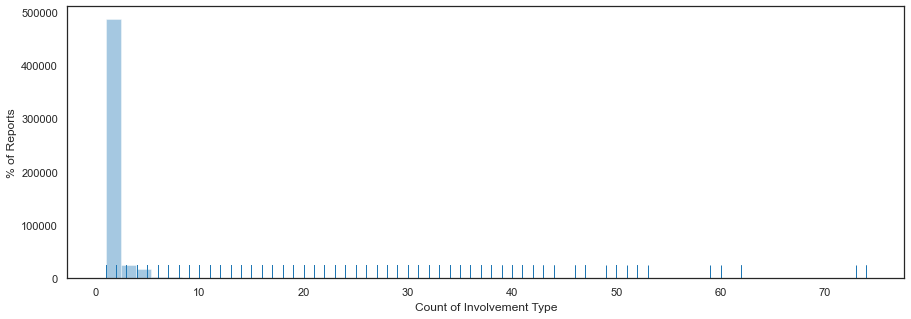

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context('notebook')
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

suspect_count = reports_by_involvement[reports_by_involvement['INVOLVEMENT']=='Suspect']
concomitant_count = reports_by_involvement[reports_by_involvement['INVOLVEMENT']=='Concomitant']

ax = sns.distplot(suspect_count.INVOLVEMENT_COUNT, kde=False, rug=True)
ax.set_xlabel('Count of Involvement Type')
ax.set_ylabel('% of Reports')

plt.show()

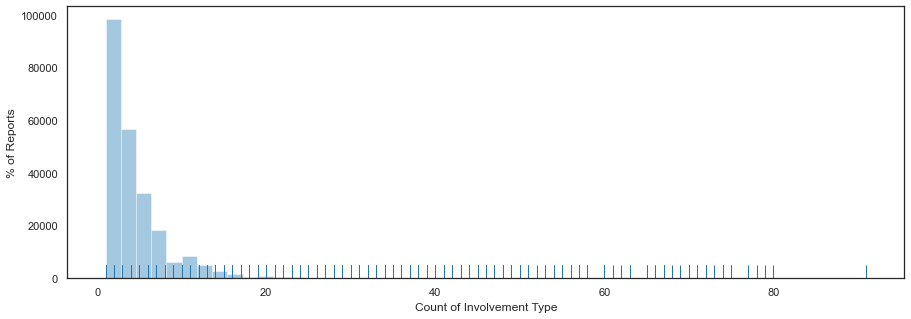

In [24]:
sns.set_style("white")
sns.set_context('notebook')
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

ax = sns.distplot(concomitant_count.INVOLVEMENT_COUNT, kde=False, rug=True)
ax.set_xlabel('Count of Involvement Type')
ax.set_ylabel('% of Reports')

plt.show()

In [25]:
# there are several reports with more than one suspect drug
# look at one example

In [26]:
suspect_count[suspect_count['INVOLVEMENT_COUNT']==suspect_count['INVOLVEMENT_COUNT'].max()]

,REPORT_ID,INVOLVEMENT,INVOLVEMENT_COUNT
522644,578180,Suspect,74
798396,901052892,Suspect,74


In [27]:
report_drug[report_drug['REPORT_ID']=='680921']

,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
555400,1101989,680921,17865,ANTIINFECTIVES FOR SYSTEMIC USE,Concomitant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
555401,1101991,680921,13732,SUBUTEX,Suspect,Unknown,8.0,Milligram,1.0,1,Day(s),1 every 1 Day(s),NaN,NaN,TABLET
555402,1101992,680921,13732,SUBUTEX,Suspect,Unknown,6.0,Milligram,1.0,1,Day(s),1 every 1 Day(s),NaN,NaN,TABLET
555404,1101998,680921,19021,METHADONE,Suspect,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
555405,1101999,680921,17683,SEROQUEL,Concomitant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TABLET
555406,1102000,680921,17428,PAXIL,Concomitant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TABLET
555407,1102001,680921,15796,METOPROLOL,Concomitant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
1218749,1101997,680921,19021,METHADONE,Suspect,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
1406971,1101996,680921,7859,SUBOXONE,Suspect,Sublingual,8.0,Milligram,1.0,1,Day(s),1 every 1 Day(s),NaN,NaN,TABLET
1698758,1101990,680921,13732,SUBUTEX,Suspect,Unknown,4.0,Milligram,1.0,1,Day(s),1 every 1 Day(s),NaN,NaN,TABLET


In [28]:
report_drug[report_drug.DRUGINVOLV_ENG=='Suspect'].nunique()

REPORT_DRUG_ID               793540
REPORT_ID                    536588
DRUG_PRODUCT_ID               21653
DRUGNAME                      16541
DRUGINVOLV_ENG                    1
ROUTEADMIN_ENG                   68
UNIT_DOSE_QTY                  2806
DOSE_UNIT_ENG                    50
FREQUENCY                        47
FREQ_TIME                        64
FREQUENCY_TIME_ENG               12
FREQ_TIME_UNIT_ENG              421
THERAPY_DURATION               1697
THERAPY_DURATION_UNIT_ENG        11
DOSAGEFORM_ENG                  290
dtype: int64

In [29]:
# does not make sense for there to be more than one suspect drug in a report
# remove reports where this is the case
report_drug_filtered = report_drug[report_drug['REPORT_ID'].isin(suspect_count[suspect_count['INVOLVEMENT_COUNT']==1]['REPORT_ID'])]
report_drug_filtered.head()

,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
2,278,209619,13417,SUCRETS CHERRY VAPOUR ACTION LOZ,Suspect,Oral,1.0,Dosage forms,NaN,NaN,NaN,NaN,NaN,NaN,LOZENGE
3,280,209619,17865,ANTIINFECTIVES FOR SYSTEMIC USE,Drug used to treat AE,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
4,281,313404,18921,INSULIN,Concomitant,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT SPECIFIED
5,287,313409,17779,CIPRALEX,Concomitant,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TABLET
6,289,313409,17387,IMOVANE,Concomitant,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TABLET


In [30]:
report_drug_filtered.nunique()

REPORT_DRUG_ID               1154618
REPORT_ID                     407363
DRUG_PRODUCT_ID                27730
DRUGNAME                       21467
DRUGINVOLV_ENG                     3
ROUTEADMIN_ENG                    66
UNIT_DOSE_QTY                   1964
DOSE_UNIT_ENG                     50
FREQUENCY                         35
FREQ_TIME                         50
FREQUENCY_TIME_ENG                12
FREQ_TIME_UNIT_ENG               336
THERAPY_DURATION                1494
THERAPY_DURATION_UNIT_ENG         11
DOSAGEFORM_ENG                   253
dtype: int64

In [31]:
# instead of using all of the concomitant drugs, use the count of concomitant drugs as the variable
# keep only the reports with suspect drugs

report_drug_filtered_2 = report_drug_filtered.merge(concomitant_count, how='left', on='REPORT_ID', copy=False)[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME',
       'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'UNIT_DOSE_QTY',
       'DOSE_UNIT_ENG', 'FREQUENCY', 'FREQ_TIME', 'FREQUENCY_TIME_ENG',
       'FREQ_TIME_UNIT_ENG', 'THERAPY_DURATION',
       'THERAPY_DURATION_UNIT_ENG', 'DOSAGEFORM_ENG',
       'INVOLVEMENT_COUNT']]

report_drug_filtered_2 = report_drug_filtered_2.rename(columns={'INVOLVEMENT_COUNT':'CONCOMITANT_DRUGS'})
report_drug_filtered_2 = report_drug_filtered_2[report_drug_filtered_2['DRUGINVOLV_ENG']=='Suspect']
report_drug_filtered_2.head()

,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG,CONCOMITANT_DRUGS
0,278,209619,13417,SUCRETS CHERRY VAPOUR ACTION LOZ,Suspect,Oral,1.0,Dosage forms,NaN,NaN,NaN,NaN,NaN,NaN,LOZENGE,1.0
5,290,209614,15502,INH,Suspect,Oral,300.0,Milligram,1.0,1,Day(s),1 every 1 Day(s),117.0,Day(s),NOT SPECIFIED,14.0
22,312,209500,17628,AVANDIA,Suspect,Oral,4.0,Milligram,NaN,1,Day(s),every 1 Day(s),54.0,Day(s),TABLET,3.0
38,344,209217,2426,RATIO-EMTEC-30,Suspect,Oral,1.0,Dosage forms,6.0,1,Day(s),6 every 1 Day(s),3.0,Day(s),TABLET,NaN
39,347,209204,16218,EFFEXOR NOS,Suspect,Oral,225.0,Milligram,NaN,1,Day(s),every 1 Day(s),274.0,Day(s),NOT SPECIFIED,2.0


In [32]:
report_drug_filtered_2.nunique()

REPORT_DRUG_ID               407363
REPORT_ID                    407363
DRUG_PRODUCT_ID               17071
DRUGNAME                      13318
DRUGINVOLV_ENG                    1
ROUTEADMIN_ENG                   66
UNIT_DOSE_QTY                  1802
DOSE_UNIT_ENG                    49
FREQUENCY                        35
FREQ_TIME                        50
FREQUENCY_TIME_ENG               12
FREQ_TIME_UNIT_ENG              325
THERAPY_DURATION               1491
THERAPY_DURATION_UNIT_ENG        11
DOSAGEFORM_ENG                  231
CONCOMITANT_DRUGS                63
dtype: int64

In [33]:
print(list(report_drug_filtered_2.ROUTEADMIN_ENG.unique()))

['Oral', 'Unknown', 'Vaginal', 'Subcutaneous', 'Transdermal', 'Parenteral', 'Feeding tube', 'Inhalation', nan, 'Intravenous (not otherwise specified)', 'Ophthalmic', 'Transplacental', 'Systemic', 'Intramuscular', 'Intraocular', 'Buccal', 'Topical', 'Intraperitoneal', 'Intrathecal', 'Intra-uterine', 'Rectal', 'Intra-nasal', 'Intradermal', 'Sublingual', 'Dental', 'Intra-arterial', 'Cutaneous', 'Epidural', 'Urethral', 'Other', 'Auricular (otic)', 'Intracardiac', 'Intra-amniotic', 'Intra-articular', 'Local infiltration', 'Intratracheal', 'Transmammary', 'Intravesical', 'Intradiscal (Intraspinal)', 'Intravenous drip', 'Hemodialysis', 'Intravenous bolus', 'Irrigation', 'Subconjunctival', 'Intra corpus cavernosum', 'Intrapericardial', 'Occlusive dressing technique', 'Intralesional', 'Endocervical', 'Oropharingeal', 'Intrathoracic', 'Subdermal', 'Perineural', 'Retrobulbar', 'Intracoronary', 'Endotracheal', 'Subdural', 'Intrapleural', 'Intracavernous', 'Intracervical', 'Intramedullar (bone marr

In [34]:
print(list(report_drug_filtered_2.DOSE_UNIT_ENG.unique()))

['Dosage forms', 'Milligram', nan, 'Microgram', 'mL', 'Gram', 'Units', 'Drops', 'IU (International Unit)', 'Teaspoonful', 'ug/kg', 'International units millions', 'Grain', 'International units thousands', 'Unknown', 'Percent', 'Litres', 'Millicuries', 'MBq', 'Milliequivalents', 'Gtt', 'mg/m2', 'nci', 'mg/kg', 'Milligram/Milliliters', 'IU/kg', 'MU', 'Dermatological Preparation', 'uL', 'Gallons', 'Microcuries', 'Sachet', 'Kilogram', 'Applicatorfull', 'Ounce', 'Nanogram', 'Other', 'Dram', 'uCi', 'UT', 'Topical Preparation', 'AD', 'GBq', 'Plaster', 'Micromol', 'Millimol', 'Centigram', 'kbq', 'ug/m2', 'Bq']


In [35]:
print(list(report_drug_filtered_2.FREQUENCY_TIME_ENG.unique()))

[nan, 'Day(s)', 'Week(s)', 'Once', 'Year(s)', 'Month(s)', 'Hour(s)', 'As required', 'Cyclical', 'Total', 'Minute(s)', 'Second(s)', 'Trimester']


In [36]:
print(list(report_drug_filtered_2.THERAPY_DURATION_UNIT_ENG.unique()))

[nan, 'Day(s)', 'Month(s)', 'Year(s)', 'Week(s)', 'Once', 'Same Day', 'Hour(s)', 'Unknown', 'Minute(s)', 'Not reported', 'Second(s)']


In [37]:
print(list(report_drug_filtered_2.DOSAGEFORM_ENG.unique()))

['LOZENGE', 'NOT SPECIFIED', 'TABLET', 'TABLET (EXTENDED-RELEASE)', 'CAPSULE, SUSTAINED-RELEASE', 'RING (SLOW-RELEASE)', 'SOLUTION SUBCUTANEOUS', 'PATCH', 'CAPSULE', 'LIQUID INTRAVENOUS', nan, 'TABLET (ENTERIC-COATED)', 'POWDER', 'SOLUTION INTRAVENOUS', 'SUSPENSION INTRAMUSCULAR', 'CREAM', 'LIQUID OPHTHALMIC', 'TABLET (DELAYED-RELEASE)', 'SOLUTION SUBARACHNOIDAL', 'POWDER FOR SOLUTION INTRAMUSCULAR', 'POWDER FOR SUSPENSION, SUSTAINED-RELEASE', 'LIQUID ORAL', 'POWDER FOR SOLUTION SUBCUTANEOUS', 'SUSPENSION ORAL', 'LIQUID INTRAMUSCULAR', 'SPRAY (NOT INHALATION)', 'DISC (EXTENDED-RELEASE)', 'GEL', 'POWDER FOR SOLUTION INTRAVENOUS', 'DROPS', 'IMPLANT', 'INSERT', 'POWDER FOR SUSPENSION ORAL', 'LIPOSOMAL', 'LIQUID SUBCUTANEOUS', 'DROPS ORAL', 'INJECTION', 'TINCTURE', 'SOLUTION DISINFECTANT (CONTACT LENS)', 'SOLUTION DIALYSIS', 'SOLUTION INTRATHECAL', 'INSERT (EXTENDED-RELEASE)', 'SUPPOSITORY', 'SOLUTION ORAL', 'EMULSION', 'LIQUID', 'SOLUTION', 'PLACEBO', 'SOLUTION INTRAVASCULAR', 'SOLUTION I

In [38]:
# Dose unit, frequency, and dosage form too messy. Not useful --> drop

report_drug_filtered_3 = report_drug_filtered_2[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME',
       'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'CONCOMITANT_DRUGS']]

In [39]:
report_drug_filtered_3.nunique()

REPORT_DRUG_ID       407363
REPORT_ID            407363
DRUG_PRODUCT_ID       17071
DRUGNAME              13318
DRUGINVOLV_ENG            1
ROUTEADMIN_ENG           66
CONCOMITANT_DRUGS        63
dtype: int64

## merge drug_ingredients to report_drugs


In [40]:
# merge drug_ingredients to report_drugs

drugs_a = report_drug_filtered_3.merge(drug_ingredients_filt_1, how='left', on='DRUG_PRODUCT_ID', copy=False)


In [41]:
drugs_a.head()

,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME_x,DRUGINVOLV_ENG,ROUTEADMIN_ENG,CONCOMITANT_DRUGS,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_y,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,parent_key
0,278,209619,13417,SUCRETS CHERRY VAPOUR ACTION LOZ,Suspect,Oral,1.0,13417014257,SUCRETS CHERRY VAPOUR ACTION LOZ,14257,RACEMENTHOL,DB14123
1,278,209619,13417,SUCRETS CHERRY VAPOUR ACTION LOZ,Suspect,Oral,1.0,134170482,SUCRETS CHERRY VAPOUR ACTION LOZ,482,HEXAHYDROTHYMOL,DB14123
2,290,209614,15502,INH,Suspect,Oral,14.0,1550206618,INH,6618,ISONIAZID,DB00951
3,290,209614,15502,INH,Suspect,Oral,14.0,1550205002839,INH,5002839,ISONIAZID,DB00951
4,312,209500,17628,AVANDIA,Suspect,Oral,3.0,17628011925,AVANDIA,11925,ROSIGLITAZONE,DB00412


In [42]:
drugs_a.nunique()

REPORT_DRUG_ID                407363
REPORT_ID                     407363
DRUG_PRODUCT_ID                17071
DRUGNAME_x                     13318
DRUGINVOLV_ENG                     1
ROUTEADMIN_ENG                    66
CONCOMITANT_DRUGS                 63
DRUG_PRODUCT_INGREDIENT_ID     33481
DRUGNAME_y                      8683
ACTIVE_INGREDIENT_ID            3119
ACTIVE_INGREDIENT_NAME          2538
parent_key                      1704
dtype: int64

In [43]:
drugs_a[drugs_a.DRUGNAME_y.isna()]

,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME_x,DRUGINVOLV_ENG,ROUTEADMIN_ENG,CONCOMITANT_DRUGS,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_y,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,parent_key
26,2,314043,13865,CONCERTA,Suspect,Oral,NaN,NaN,NaN,NaN,NaN,NaN
37,147,212133,16651,APO-PROPRANOLOL,Suspect,Oral,4.0,NaN,NaN,NaN,NaN,NaN
38,157,313383,5554,NICODERM 21MG/DAY TRD 114MG/PAD,Suspect,Transdermal,NaN,NaN,NaN,NaN,NaN,NaN
62,656,114061,15143,SECOBARBITAL,Suspect,Oral,NaN,NaN,NaN,NaN,NaN,NaN
73,708,307822,3341,FRAGMIN 5000IU(ANTI-XA)/0.2ML,Suspect,Subcutaneous,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
620750,1427637,901109422,6347,REMICADE,Suspect,Intravenous (not otherwise specified),2.0,NaN,NaN,NaN,NaN,NaN
620752,1573136,900417723,6347,REMICADE,Suspect,Intravenous (not otherwise specified),2.0,NaN,NaN,NaN,NaN,NaN
620753,1584249,900828720,6347,REMICADE,Suspect,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
620760,1672699,118714,13222,TICLID TAB 250MG,Suspect,Oral,1.0,NaN,NaN,NaN,NaN,NaN


In [44]:
drug_ingredients[drug_ingredients['DRUG_PRODUCT_ID']=='31320']

,DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME


In [45]:
drug_ingredients_filt_1[drug_ingredients_filt_1['DRUG_PRODUCT_ID']=='31320']

,DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,parent_key


In [46]:
drug_ingredients_filt_1.head()

,DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,parent_key
0,64910755,6491,COPPERTONE OIL FREE LOTION SPF 45,755,AVOBENZONE,DB09495
1,86730755,8673,NIVEA VISAGE Q10 ADVANCED WRINKLE REDUCER LOTION,755,AVOBENZONE,DB09495
2,96300755,9630,NEUTROGENA MEN SENSITIVE SKIN OIL-FREE MOISTURE,755,AVOBENZONE,DB09495
3,59080755,5908,SPF 30 KIDS SPRAY-ON SUNSCREEN,755,AVOBENZONE,DB09495
4,224650755,22465,BANANA BOAT CONTINUOUS SPRAY KIDS SUNSCREEN SP...,755,AVOBENZONE,DB09495


In [47]:

drugs_a = drugs_a[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME_x',
       'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'UNIT_DOSE_QTY', 'DOSE_UNIT_ENG',
       'FREQUENCY', 'FREQ_TIME', 'FREQUENCY_TIME_ENG', 'FREQ_TIME_UNIT_ENG', 
       'THERAPY_DURATION', 'THERAPY_DURATION_UNIT_ENG', 'DOSAGEFORM_ENG', 
       'DRUG_PRODUCT_INGREDIENT_ID', 'ACTIVE_INGREDIENT_ID', 'ACTIVE_INGREDIENT_NAME']]

drugs_a = drugs_a.rename(columns={'DRUGNAME_x':'DRUGNAME'})

drugs_a.info()

KeyError: "['DOSAGEFORM_ENG', 'FREQUENCY', 'UNIT_DOSE_QTY', 'THERAPY_DURATION', 'FREQUENCY_TIME_ENG', 'FREQ_TIME_UNIT_ENG', 'DOSE_UNIT_ENG', 'FREQ_TIME', 'THERAPY_DURATION_UNIT_ENG'] not in index"

In [ ]:
# merge dataframes

# merge drug_ingredients to report_drugs

drugs_b = report_drug.merge(drug_ingredients_dpd, on='DRUG_PRODUCT_ID')

drugs_b = drugs_b[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME_x',
       'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'UNIT_DOSE_QTY', 'DOSE_UNIT_ENG',
       'FREQUENCY', 'FREQ_TIME', 'FREQUENCY_TIME_ENG', 'FREQ_TIME_UNIT_ENG', 
       'THERAPY_DURATION', 'THERAPY_DURATION_UNIT_ENG', 'DOSAGEFORM_ENG', 
       'DRUG_PRODUCT_INGREDIENT_ID', 'ACTIVE_INGREDIENT_ID', 'ACTIVE_INGREDIENT_NAME']]

drugs_b = drugs_b.rename(columns={'DRUGNAME_x':'DRUGNAME'})

drugs_b.info()

In [ ]:
drugs_b.nunique()

In [ ]:
# merge reports to reactions

#reports_a = reports.merge(reactions, left_on='REPORT_NO', right_on='REPORT_ID')


In [ ]:
# merge drugs to reactions

CVADR = drugs_b.merge(reactions, how='left', left_on='REPORT_ID', right_on='REPORT_ID')

In [ ]:
CVADR.nunique()

In [ ]:
CVADR.dtypes

In [ ]:
CVADR.to_csv(data_dir + '/CVADR/full_dataset_2_17.csv')

In [ ]:
CVADR = pd.read_csv(data_dir + '/CVADR/full_dataset_2_17.csv')

In [ ]:
CVADR.head()

In [ ]:
report_count_by_ade = CVADR.groupby('PT_NAME_ENG')['REPORT_ID'].count().reset_index().sort_values('REPORT_ID', ascending=False)

In [ ]:
reports.head()

In [ ]:
reports.columns.values

In [ ]:
reports.nunique()

In [ ]:
# need to normalize
# age
# weight

In [ ]:
import seaborn as sns


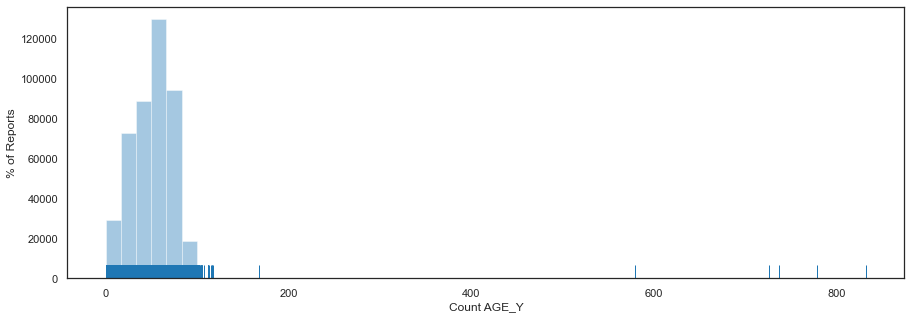

In [48]:
# check distibution of AGE_Y (shoudl be in years)

sns.set_style("white")
sns.set_context('notebook')
fig, ax = plt.subplots()
fig.set_size_inches(15,5)


ax = sns.distplot(reports[~reports.AGE_Y.isna()].AGE_Y, kde=False, rug=True)
ax.set_xlabel('Count AGE_Y')
ax.set_ylabel('% of Reports')

plt.show()

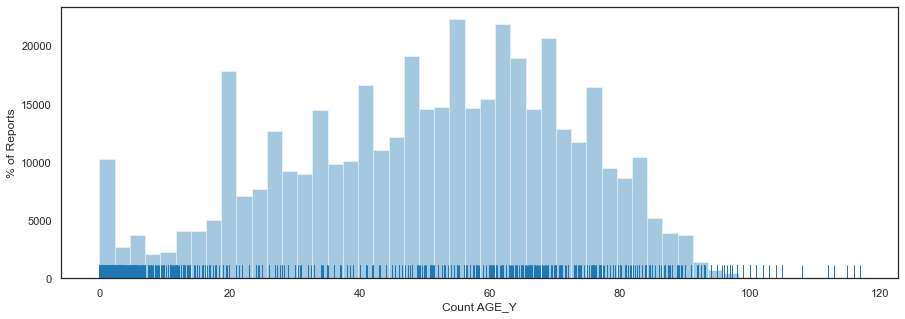

In [49]:
sns.set_style("white")
sns.set_context('notebook')
fig, ax = plt.subplots()
fig.set_size_inches(15,5)


ax = sns.distplot(reports[reports.AGE_Y <= 122].AGE_Y, kde=False, rug=True) # oldest peron on earth is 122 years old
ax.set_xlabel('Count AGE_Y')
ax.set_ylabel('% of Reports')

plt.show()

In [50]:
reports_filt_1 = reports[reports.AGE_Y <= 122]
reports_filt_1.nunique()

REPORT_NO                   433606
E2B_IMP_SAFETYREPORT_ID     433606
VERSION_NO                      68
DATRECEIVED                  12691
DATINTRECEIVED               12665
MAH_NO                      241118
REPORT_TYPE_ENG                  7
GENDER_ENG                       4
AGE                            402
AGE_Y                          615
AGE_UNIT_ENG                     6
OUTCOME_ENG                      6
WEIGHT                        3236
WEIGHT_UNIT_ENG                  4
HEIGHT                         792
HEIGHT_UNIT_ENG                  2
SERIOUSNESS_ENG                  2
DEATH                            2
DISABILITY                       2
CONGENITAL_ANOMALY               2
LIFE_THREATENING                 2
HOSP_REQUIRED                    2
OTHER_MEDICALLY_IMP_COND         2
REPORTER_TYPE_ENG                6
SOURCE_ENG                       5
dtype: int64

In [51]:
reports_a = reports[['REPORT_NO', 'DATRECEIVED', 'DATINTRECEIVED', 'REPORT_TYPE_ENG',
       'GENDER_ENG', 'AGE', 'AGE_Y', 'AGE_UNIT_ENG', 'OUTCOME_ENG',
       'WEIGHT', 'WEIGHT_UNIT_ENG', 'HEIGHT', 'HEIGHT_UNIT_ENG',
       'SERIOUSNESS_ENG', 'DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY',
       'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND',
       'REPORTER_TYPE_ENG', 'SOURCE_ENG']]

In [52]:
reports.WEIGHT_UNIT_ENG.unique()

array(['Kilograms', nan, 'Pounds', 'Unknown', 'Ounces'], dtype=object)

In [66]:
reports_a.head(1) 

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_ENG,AGE,AGE_Y,AGE_UNIT_ENG,OUTCOME_ENG,WEIGHT,WEIGHT_UNIT_ENG,HEIGHT,HEIGHT_UNIT_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG
0,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,48.0,Years,Unknown,64.0,Kilograms,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community


In [76]:
# convert all weights to kilograms

def fix_weight(row):
    if row['WEIGHT_UNIT_ENG']=='Kilograms':
        return row['WEIGHT']
    if row['WEIGHT_UNIT_ENG']=='Pounds':
        return row['WEIGHT']*.454
    if row['WEIGHT_UNIT_ENG']=='Ounces':
        return row['WEIGHT']*0.0283495
    else:
        return np.NaN

reports_a['WEIGHT_KG'] = reports_a.apply(fix_weight, axis=1)


C:\Users\v.ltam\Downloads\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [81]:
reports_a[reports_a['WEIGHT_UNIT_ENG']=='Ounces'][['WEIGHT', 'WEIGHT_UNIT_ENG', 'WEIGHT_KG']]

,WEIGHT,WEIGHT_UNIT_ENG,WEIGHT_KG
110245,125.0,Ounces,3.543687
122798,61.0,Ounces,1.729319
142366,88.0,Ounces,2.494756
159997,215.0,Ounces,6.095142
166134,130.0,Ounces,3.685435
220828,1906.0,Ounces,54.034147
256922,107.0,Ounces,3.033396
317924,47.0,Ounces,1.332426
351677,151.0,Ounces,4.280774
412425,72.7,Ounces,2.061009
